In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data_path = '/Users/ameliabaum/Desktop/Amelia/Berkeley Fall 2019/CY PLAN 257/Final Project/data/'


In [3]:
zcode_data = pd.read_csv(data_path+"zip_code_features.csv")
zcode_data.head()
zcode_data.columns

Index(['ZIP', 'num_sw', 'num_ndnw', 'num_pickdrop', 'num_discret', 'num_shop',
       'num_home', 'num_em', 'num_m', 'num_aft', 'num_evn', 'num_walk',
       'num_bike', 'num_auto', 'num_transit', 'num_other'],
      dtype='object')

In [4]:
# standard_data
features = zcode_data.columns[1:]
features

Index(['num_sw', 'num_ndnw', 'num_pickdrop', 'num_discret', 'num_shop',
       'num_home', 'num_em', 'num_m', 'num_aft', 'num_evn', 'num_walk',
       'num_bike', 'num_auto', 'num_transit', 'num_other'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler
features = zcode_data.columns[1:]
# Separating out the features
x = zcode_data.loc[:, features].values
# Separating out the target
# y = zcode_data.loc[:,['ZIP']].values
# Standardizing the features
standard_data = StandardScaler().fit_transform(x)

/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
n_components=10
pca = PCA(n_components)
principalComponents = pca.fit_transform(standard_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["principal component {0}".format(i+1) for i in range(n_components)])

In [25]:
pd.DataFrame(pca.components_, columns=features)

,num_sw,num_ndnw,num_pickdrop,num_discret,num_shop,num_home,num_em,num_m,num_aft,num_evn,num_walk,num_bike,num_auto,num_transit,num_other
0,0.283738,0.265887,0.272161,0.290097,0.268897,0.270615,0.277672,0.305830,0.305823,0.300181,0.210336,0.209249,0.301222,0.098524,0.047879
1,0.059075,-0.127989,0.063379,-0.046438,-0.129129,-0.122776,0.015811,-0.018614,-0.047930,-0.025308,0.187095,-0.009982,-0.095266,0.640606,0.695785
2,0.122968,-0.129710,-0.214799,0.010702,-0.143924,-0.182866,-0.150996,0.018022,-0.016116,0.010506,0.606238,0.591882,-0.200122,0.042248,-0.290635
3,-0.006072,-0.024477,0.043676,-0.011404,-0.036033,-0.059801,0.032956,0.003667,-0.004817,0.006434,0.127582,0.205568,-0.038828,-0.740692,0.618563
4,-0.139374,0.110696,-0.062605,0.051101,0.100889,0.044659,-0.151780,-0.089982,-0.035264,-0.031262,-0.605072,0.714498,0.067727,0.155219,0.104705
5,0.046830,0.575723,-0.195779,0.053989,0.477506,-0.464236,-0.333266,0.021455,0.054201,-0.169362,0.102362,-0.139030,-0.031767,0.017946,0.085394
6,-0.335338,0.083396,-0.717385,0.033295,0.162528,0.511943,0.142704,-0.009384,0.033422,0.041745,0.159948,-0.055583,-0.054262,0.045501,0.139077
7,-0.527625,-0.230999,0.412590,-0.076248,0.373984,0.197380,-0.477883,-0.032852,0.049686,0.174389,0.223560,0.000501,-0.023735,0.022561,-0.000513
8,-0.197222,0.484575,0.103796,0.331500,-0.649372,0.187022,-0.364955,0.052579,-0.014006,0.061569,0.060282,-0.069003,-0.005349,-0.000349,0.024402
9,-0.146871,0.488974,0.237190,-0.711636,-0.058345,0.120277,0.296885,-0.068560,-0.100435,-0.033174,0.124463,0.134099,-0.130190,0.035703,-0.055236


In [8]:
finalDf = pd.concat([principalDf, zcode_data[['ZIP']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,ZIP
0,-0.423623,-0.083533,0.397452,0.197063,90001
1,-1.745629,0.083720,0.201421,0.096383,90002
2,-0.834414,-0.046175,0.043871,0.066960,90003
3,-0.506615,0.124565,0.854259,0.318724,90004
4,-1.221657,0.184625,0.725162,0.210071,90005


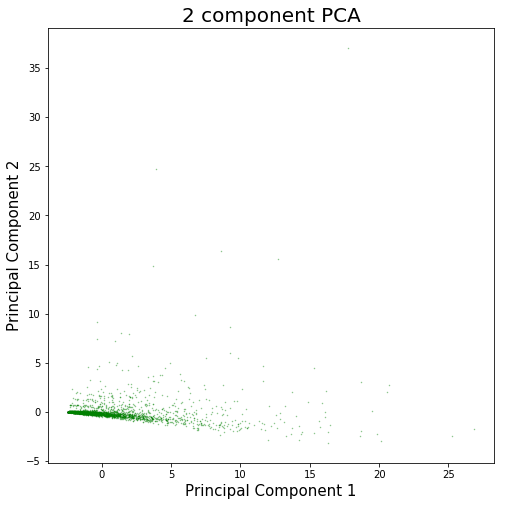

In [9]:
plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 

# targets = finalDf["ZIP"][0:2]
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['ZIP'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()
ax = plt.scatter(finalDf.iloc[:,0], finalDf.iloc[:,1], color='g', alpha=.5, edgecolor='g', s=0.2)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.show()

In [27]:
explained = pca.explained_variance_ratio_
explained_sum = np.cumsum(explained)
# eigenvector = np.array(range(1,24))

print(explained_sum)
# print(len(eigenvector))

[0.69247122 0.7860315  0.83902699 0.87668953 0.90675411 0.93347087
 0.94879576 0.96317433 0.97485753 0.98480122]


In [11]:
zcode_data.head()

,ZIP,num_sw,num_ndnw,num_pickdrop,num_discret,num_shop,num_home,num_em,num_m,num_aft,num_evn,num_walk,num_bike,num_auto,num_transit,num_other
0,90001,8,4,1,12,2,12,12,53,30,35,28,4,79,0,0
1,90002,6,2,5,2,0,1,1,22,14,9,16,0,22,0,0
2,90003,14,0,6,8,10,8,4,35,34,37,20,0,65,0,0
3,90004,8,4,6,10,5,5,8,29,33,48,49,4,46,0,0
4,90005,11,0,2,4,2,3,5,28,25,30,41,1,30,0,0


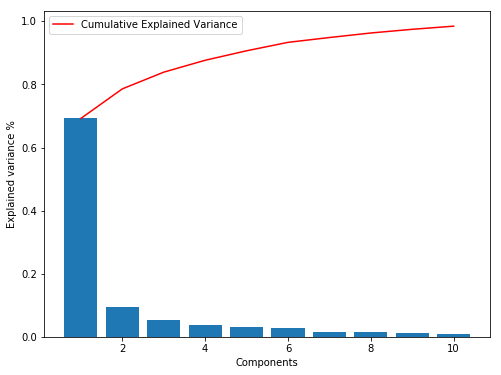

In [26]:
plt.figure(figsize=(8,6))
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance %')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')